              
<html> 
    <body>
        <b>
       <font size="2"
          face="verdana"
          color="steelblue"
          style="margin-left:50.5em">
            Author : SWEETY ROY
        </font>
        </b>
    <br> 
    </body> 
</html>


<html> 
     <body>
      <font size="4"
          face="verdana"
          color="black"
          style="margin-left:30.5em">
          <b> GRIP @The Sparks Foundation </b>
        </font>
         <br><br><br>
       <font size="4.5"
          face="Courier New"
          color="black"
          >
          <b> Domain: Data Science and Business Analytics<br>
Task Type: Prediction using Supervised ML<br>
Level - Beginner<br>
Task 1:Predict the percentage score of a student based on the study hours. </b>
        </font>

  </body> 
</html>



<b><big>Reading the data</big></b><br/>
The data has one file "http://bit.ly/w-data". This file contains scores and Hours studied for 25 students. 

## Data description
The business meaning of each column in the data is as below

* <b>Hours</b>: indicates the hours studied per day.
* <b>Scores</b>: The percentage scores of each student.
 </b>

In [2]:
import numpy as np
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Pandas lib is used to read a csv file by prodiving the path of file to read_csv() function
# The output of read_csv function here is stored as a DataFrame

student_data = pd.read_csv('http://bit.ly/w-data')
print(student_data.shape)
student_data.sample(n=5,
       random_state=56,
    axis=0)

(25, 2)


,Hours,Scores
16,2.5,30
19,7.4,69
22,3.8,35
3,8.5,75
18,6.1,67


In [9]:
# Removing duplicate rows if any
student_data=student_data.drop_duplicates()
print('Shape After deleting duplicate values:', student_data.shape)

Shape After deleting duplicate values: (25, 2)


# Defining the problem statement: 
#### Create a ML model which can predict the Percentage score of students based on the study hours
* Target Variable: Scores
* Predictors: Hours

# Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a <b>supervised ML Regression model</b>, as the <b> target variable </b> is Continuous.

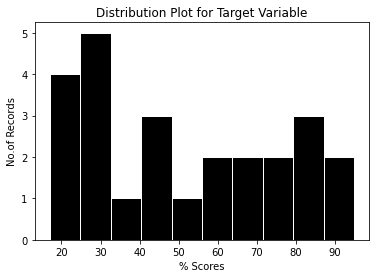

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
# Creating Bar chart as the Target variable is Continuous
plt.hist(student_data['Scores'],color='black', edgecolor='white',
              linewidth=1)
plt.xlabel("% Scores")
plt.ylabel("No.of Records")
plt.title("Distribution Plot for Target Variable")
 
plt.show()

 There are sufficient number of rows in this distribution for each type of values.

# Basic Data Exploration

In [6]:
student_data.nunique()

Hours     23
Scores    23
dtype: int64

In [7]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
student_data.describe(include='all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Basic Data Exploration Results

* <b>Hours</b>: Continuous 
* <b>Scores</b>: Categorical, <b>Target Variable!</b>


# Visual Exploratory Data Analysis
## Univariate Analaysis- Understanding the data distribution

* Continuous variables: Histogram

Index(['Hours', 'Scores'], dtype='object')


array([[<AxesSubplot:title={'center':'Hours'}>,
        <AxesSubplot:title={'center':'Scores'}>]], dtype=object)

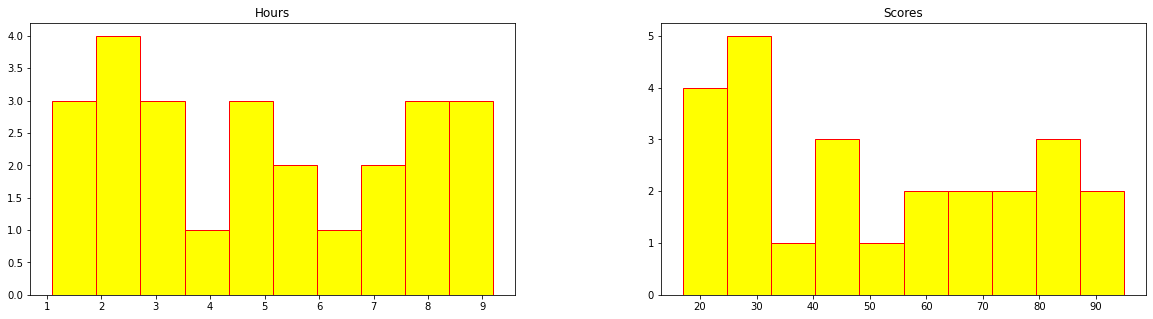

In [39]:
%matplotlib inline
import MyLibrary

from MyLibrary import newfunction

print(student_data.columns)

# Calling the function
# Plotting histograms of multiple columns together
student_data.hist(['Hours','Scores'], figsize=(20,5), grid=False,color='yellow', edgecolor='red')

# Feature Selection

## Bivariate Analaysis- Understanding the covariance between the predictor and target variable

* Continuous Vs Continuous ---- Scatter Plot

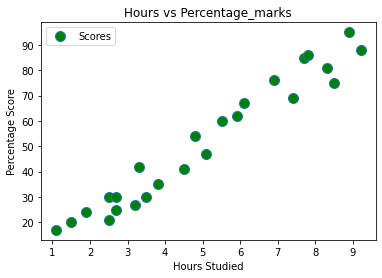

Correlation Matrix:

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [51]:
student_data.plot(x='Hours', y='Scores', style='o',markersize=10, markerfacecolor='green',)  
plt.title('Hours vs Percentage_marks')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()
print("Correlation Matrix:\n")
print(student_data.corr())     

# Scatter charts interpretation

<html> 
     <body>
      <font size="4"
          face="verdana"
          color="orange"
          >
          <b> Increasing Trend </b>
          </font>
     </body> 
</html>  <br>       
From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Machine Learning: Splitting the data into Training and Testing sample

In [99]:
# Separate Target Variable and Predictor Variables
TargetVariable='Scores'
Predictors=['Hours']

X=student_data[Predictors].values
y=student_data[TargetVariable].values


# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print(X_test)

[[3.8]
 [4.8]
 [2.5]
 [8.5]
 [4.5]
 [7.7]
 [9.2]
 [5.9]]


# Multiple linear Regression

Measuring Goodness of fit
R2 Value: 0.9506733363650617

 Plotting the regression line


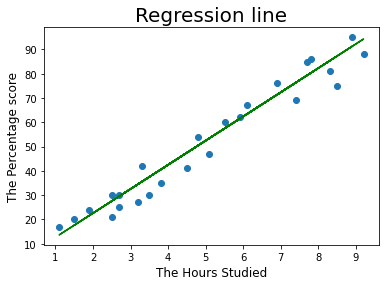


##### Test Data Predictions ##########

   Hours  Scores  PredictedScores
0    3.8      35           40.505
1    4.8      54           50.462
2    2.5      21           27.561
3    8.5      75           87.303
4    4.5      41           47.475
5    7.7      85           79.338
6    9.2      88           94.273
7    5.9      62           61.415

##### Visual Comparison of Predicted Values with Actual ##########


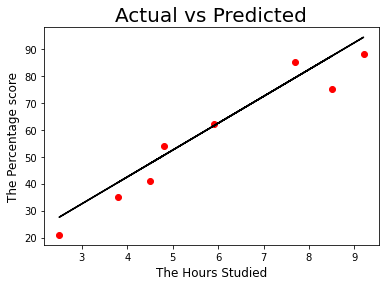


##### Model Accuracy ##########
Mean Accuracy on test data: 87.44336283766202
Median Accuracy on test data: 88.57150974025974


In [100]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)

from sklearn import metrics
print("Measuring Goodness of fit")
print('R2 Value:',metrics.r2_score(y, LREG.predict(X)))

print("\n Plotting the regression line")
line = LREG.coef_*X+LREG.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='green')
plt.title('Regression line', size=20)
plt.ylabel('The Percentage score', size=12)
plt.xlabel('The Hours Studied', size=12)
plt.show()

##########################################################################
print('\n##### Test Data Predictions ##########\n')


# Printing some sample values of prediction
prediction=LREG.predict(X_test)
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction,3)

# Printing sample prediction values
print(TestingDataResults)

print('\n##### Visual Comparison of Predicted Values with Actual ##########')
plt.scatter(x=X_test, y=y_test, color='red')
plt.plot(X_test, prediction, color='black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('The Percentage score', size=12)
plt.xlabel('The Hours Studied', size=12)
plt.show()

print("\n##### Model Accuracy ##########") 
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Scores']-TestingDataResults['PredictedScores']))/TestingDataResults['Scores'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)




<b><big>What will be the predicted score of a student if he/she studies for 9.25 hrs/ day? <br></big></b>
Now it's time to test our model with sample testing hours, so in this case, we take 9.25 hours, i.e, if a student studies for 9.25 hours, approximately how many marks he can get based on the data we received and the model we applied.

In [102]:
# You can also test with your own data
sample_X = [9.25]
sample_score=LREG.predict([sample_X])
print("No of Hours = {}".format(sample_X))
print("Predicted Score = {}".format(round(sample_score[0],3)))

No of Hours = [9.25]
Predicted Score = 94.771


<b>
According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 94.78. </b>